# Capstone Project - The Battle of Neighborhoods (Week 2)

### Download of all the dependencies that we need

In [2]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import folium # plotting library

from bs4 import BeautifulSoup
from IPython.display import display_html
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors

print('Libraries imported.')

Libraries imported.


### Scraping the Wikipedia page for the list of boroughs of Nantes Metropolis

In [3]:
# Download data and parse it:
request = requests.get('https://fr.wikipedia.org/wiki/Nantes_M%C3%A9tropole')
soup = BeautifulSoup(request.text, 'html.parser')
# First remove Falsey values
table_soup = soup.find_all('table')
filtered_table_soup = [table for table in table_soup if table.caption is not None]

required_table = None

for table in filtered_table_soup:
    if str(table.caption.string).strip() == 'Liste des communes de l’intercommunalité':
        required_table = table
        break
# Then display the table
table_str =  str(table)
display_html(table_str, raw=True)

Nom,Code Insee,Gentilé,Superficie (km2),Population (dernière pop. légale),Densité (hab./km2)
Nantes(siège),44109,Nantais,"65,19",‍314 138 (2018),4 819
Basse-Goulaine,44009,Goulainais,"13,74",‍9 093 (2018),662
Bouaye,44018,Boscéens,"13,83",‍7 914 (2018),572
Bouguenais,44020,Bouguenaisiens,"31,5",‍19 658 (2018),624
Brains,44024,Brennois,"15,31",‍2 836 (2018),185
Carquefou,44026,Carquefoliens,"43,42",‍20 032 (2018),461
La Chapelle-sur-Erdre,44035,Chapelains,"33,42",‍19 526 (2018),584
Couëron,44047,Coueronnais,"44,03",‍21 862 (2018),497
Indre,44074,Indrais,"4,72",‍4 037 (2018),855
Mauves-sur-Loire,44094,Malviens,"14,75",‍3 230 (2018),219


## Data Preparation

In [4]:
# The HTML table is converted to a Pandas DataFrame
df_init = pd.read_html(table_str, flavor= 'html5lib')
df = df_init[0]
df.head()

,Nom,Code Insee,Gentilé,Superficie (km2),Population (dernière pop. légale),Densité (hab./km2)
0,Nantes(siège),44109,Nantais,6519,314 138 (2018),4 819
1,Basse-Goulaine,44009,Goulainais,1374,9 093 (2018),662
2,Bouaye,44018,Boscéens,1383,7 914 (2018),572
3,Bouguenais,44020,Bouguenaisiens,315,19 658 (2018),624
4,Brains,44024,Brennois,1531,2 836 (2018),185


## Data Cleaning

In [5]:
# We will drop the columns that we don't want to keep :
columns_to_keep = ['Nom', 'Code Insee']
df1 = df.reindex(columns=columns_to_keep)
# df1.head()

#We rename 'Nantes(siège)' to 'Nantes'
df1 = df1.replace(['Nantes(siège)'], 'Nantes')

# We will only keep the boroughs that are adjacent to the center of Nantes : 
boroughs_to_keep = ['Nantes', 'Saint-Herblain', 'Rezé']
df2 = df1[df1['Nom'].isin(boroughs_to_keep)]
df2

,Nom,Code Insee
0,Nantes,44109
13,Rezé,44143
15,Saint-Herblain,44162


### Importing the geojson file containing the Latitudes and Longitudes for neighbourhoods in Nantes Metropolis

In [6]:
import geopandas as gpd
geo = gpd.read_file('data/geo-Nantes.geojson')

#We rename 'St-Herblain' to 'Saint-Herblain'
geo = geo.replace(['St-Herblain'], 'Saint-Herblain')

#We keep only also in this dataframe the boroughs that we want
geo = geo[geo['libcom'].isin(boroughs_to_keep)]

# We will drop the columns that we don't want to keep :
columns_to_keep2 = ['nom', 'libcom', 'geometry']
geo = geo.reindex(columns=columns_to_keep2)

geo.head()

,nom,libcom,geometry
0,La Houssais,Rezé,"POLYGON ((-1.56017 47.16717, -1.56012 47.16745..."
1,Ragon,Rezé,"POLYGON ((-1.54775 47.14881, -1.54781 47.14890..."
2,Dervallières - Zola,Nantes,"POLYGON ((-1.57102 47.20608, -1.57244 47.20712..."
3,Malakoff - Saint-Donatien,Nantes,"POLYGON ((-1.53871 47.21124, -1.53871 47.21124..."
4,Pont Rousseau,Rezé,"POLYGON ((-1.55336 47.18541, -1.55347 47.18549..."


### Merge the two DataFrames

In [7]:
# We rename a colum in our df2 in order to have the columns having the same name in order to join them
df3 = df2.rename(columns={'Nom': 'libcom'})
df_geo = pd.merge(df3, geo, on='libcom')
df_geo.head()

,libcom,Code Insee,nom,geometry
0,Nantes,44109,Dervallières - Zola,"POLYGON ((-1.57102 47.20608, -1.57244 47.20712..."
1,Nantes,44109,Malakoff - Saint-Donatien,"POLYGON ((-1.53871 47.21124, -1.53871 47.21124..."
2,Nantes,44109,Nantes Nord,"POLYGON ((-1.57686 47.25480, -1.57692 47.25487..."
3,Nantes,44109,Doulon - Bottière,"POLYGON ((-1.51491 47.21645, -1.51545 47.21767..."
4,Nantes,44109,Nantes Sud,"POLYGON ((-1.51813 47.18059, -1.51813 47.18059..."


In [88]:
#  We will convert the geometries into Lambert_Conformal_Conic_2SP (EPSG: 2154) in order to flat up the map of France (where the city of Nantes is located) 
df_geo = df_geo.set_geometry('geometry', crs=2154)

#Find the center point
df_geo['Center_point'] = df_geo['geometry'].centroid

#Extract lat and lon from the centerpoint
df_geo["lat"] = df_geo.Center_point.map(lambda p: p.y)
df_geo["lon"] = df_geo.Center_point.map(lambda p: p.x)
df_geo.head()

,libcom,Code Insee,nom,geometry,Center_point,lat,lon
0,Nantes,44109,Dervallières - Zola,"POLYGON ((-1.57102 47.20608, -1.57244 47.20712...",POINT (-1.58934 47.21624),47.216244,-1.589340
1,Nantes,44109,Malakoff - Saint-Donatien,"POLYGON ((-1.53871 47.21124, -1.53871 47.21124...",POINT (-1.53563 47.22282),47.222819,-1.535631
2,Nantes,44109,Nantes Nord,"POLYGON ((-1.57686 47.25480, -1.57692 47.25487...",POINT (-1.56547 47.25750),47.257496,-1.565468
3,Nantes,44109,Doulon - Bottière,"POLYGON ((-1.51491 47.21645, -1.51545 47.21767...",POINT (-1.50656 47.23706),47.237059,-1.506559
4,Nantes,44109,Nantes Sud,"POLYGON ((-1.51813 47.18059, -1.51813 47.18059...",POINT (-1.53047 47.19162),47.191625,-1.530468


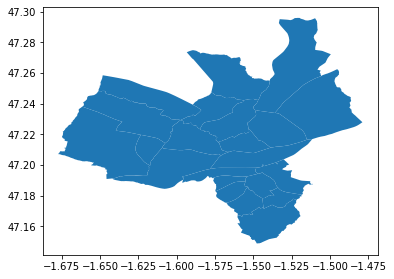

In [89]:
import matplotlib.pyplot as plt

df_geo.plot(figsize=(6, 6))
plt.show()

### Add marker showing the area and length of each borough

In [91]:
map_nantes = folium.Map(location=[47.30, -1.475], zoom_start=11, tiles='CartoDB positron')

# add markers to map
for _, r in df_geo.iterrows():
    label = '{}, {}'.format(r['nom'], r['libcom'])
    sim_geo = gpd.GeoSeries(r['geometry']).simplify(tolerance=0.001)
    geo_j = sim_geo.to_json()
    geo_j = folium.GeoJson(data=geo_j,
                           style_function=lambda x: {'fillColor': 'orange'})
#     folium.Popup(label).add_to(geo_j)
    folium.Marker(
        location=[r['lat'], r['lon']],
        popup=label).add_to(geo_j)  
    geo_j.add_to(map_nantes)

# map_nantes.save('map_nantes.html')

display(map_nantes)

In [92]:
# Some neighbourhoods are too far away from the center of Nantes, we will drop these rown in the dataframe
neighbourhoods_to_drop = ['Bourg', 'Ragon', 'Blordière', 'La Houssais', 'Château de Rezé', 'Nord', 'Nantes Nord', 'Nantes Erdre', 'Doulon']
df_geo2 = df_geo[~df_geo.nom.isin(neighbourhoods_to_drop)]
df_geo_final = df_geo2.drop(['Code Insee', 'geometry', 'Center_point'], axis = 1)
df_geo_final = df_geo_final.rename(columns = {'libcom':'Borough','nom':'Neighbourhood', 'lat':'Latitude', 'lon':'Longitude'})
df_geo_final.head()

,Borough,Neighbourhood,Latitude,Longitude
0,Nantes,Dervallières - Zola,47.216244,-1.589340
1,Nantes,Malakoff - Saint-Donatien,47.222819,-1.535631
3,Nantes,Doulon - Bottière,47.237059,-1.506559
4,Nantes,Nantes Sud,47.191625,-1.530468
5,Nantes,Breil - Barberie,47.236107,-1.577037


In [94]:
# create map of New York using latitude and longitude values
map_nantes_final = folium.Map(location=[47.30, -1.475], zoom_start=10)

# add markers to map
for lat, lng, borough, neighbourhood in zip(df_geo_final['Latitude'], df_geo_final['Longitude'], df_geo_final['Borough'], df_geo_final['Neighbourhood']):
    label = '{}, {}'.format(neighbourhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_nantes_final)  
    
map_nantes_final

### Define Foursquare Credentials and Version

In [95]:
CLIENT_ID = '3TRVIK42IR13OTIA0ZZ4QFVJ3CXUDNO12M3IJF3QBVIGQC3L' # your Foursquare ID
CLIENT_SECRET = 'GKUC4L1JTXBJLYQJHTAAYGJBPQDUWLLZLBPDBA4CF42E5HA5' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value


In [127]:
# We use the Foursquare API in order to have the venues in which we are interested (https://developer.foursquare.com/docs/build-with-foursquare/categories/)
vegan_restaurant = '4bf58dd8d48988d1d3941735'
park = '4bf58dd8d48988d163941735'
yoga_center ='4bf58dd8d48988d175941735'
organic_shop = '52f2ab2ebcbc57f1066b8b45'
foursquare_categories = ",".join([vegan_restaurant, park, yoga_center, organic_shop])
print(foursquare_categories)


4bf58dd8d48988d1d3941735,4bf58dd8d48988d163941735,4bf58dd8d48988d175941735,52f2ab2ebcbc57f1066b8b45


### Explore Neighborhoods in Nantes

In [128]:
radius = 500
LIMIT = 100
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&categoryId={}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng,
            foursquare_categories,
            radius, 
            LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=3TRVIK42IR13OTIA0ZZ4QFVJ3CXUDNO12M3IJF3QBVIGQC3L&client_secret=GKUC4L1JTXBJLYQJHTAAYGJBPQDUWLLZLBPDBA4CF42E5HA5&v=20180605&ll=47.2109545027574,-1.6183917149172282&categoryId=4bf58dd8d48988d1d3941735,4bf58dd8d48988d163941735,4bf58dd8d48988d175941735,52f2ab2ebcbc57f1066b8b45&radius=500&limit=100'

In [138]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&categoryId={}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng,
            foursquare_categories,
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [139]:
nantes_venues = getNearbyVenues(names=df_geo_final['Neighbourhood'],
                                   latitudes=df_geo_final['Latitude'],
                                   longitudes=df_geo_final['Longitude']
                                  )

Dervallières - Zola
Malakoff - Saint-Donatien
Doulon - Bottière
Nantes Sud
Breil - Barberie
Ile de Nantes
Bellevue - Chantenay - Sainte Anne
Hauts Pavés - Saint Félix
Centre Ville
Pont Rousseau
Hôtel de Ville
Trentemoult
Centre
Est


In [140]:
print(nantes_venues.shape)
nantes_venues.head()

(27, 7)


,Neighborhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Malakoff - Saint-Donatien,47.222819,-1.535631,Parc de la Moutonnerie,47.219616,-1.533185,Park
1,Malakoff - Saint-Donatien,47.222819,-1.535631,Le Temple Du Fitness,47.219785,-1.532907,Gym
2,Nantes Sud,47.191625,-1.530468,Parc de la Crapaudine,47.189168,-1.533320,Park
3,Nantes Sud,47.191625,-1.530468,Bords de Sèvre nantaise,47.189084,-1.534639,Park
4,Breil - Barberie,47.236107,-1.577037,Square Georges Washington,47.233773,-1.575480,Park


In [135]:
nantes_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Bellevue - Chantenay - Sainte Anne,1,1,1,1,1,1
Breil - Barberie,4,4,4,4,4,4
Centre,1,1,1,1,1,1
Centre Ville,5,5,5,5,5,5
Est,2,2,2,2,2,2
Hauts Pavés - Saint Félix,1,1,1,1,1,1
Hôtel de Ville,1,1,1,1,1,1
Ile de Nantes,4,4,4,4,4,4
Malakoff - Saint-Donatien,2,2,2,2,2,2


In [141]:
# one hot encoding
nantes_onehot = pd.get_dummies(nantes_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
nantes_onehot['Neighborhood'] = nantes_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [nantes_onehot.columns[-1]] + list(nantes_onehot.columns[:-1])
nantes_onehot = nantes_onehot[fixed_columns]

nantes_onehot.head()

,Neighborhood,Gym,Gym / Fitness Center,Health Food Store,Park,Supermarket,Tennis Stadium,Trade School,Vegetarian / Vegan Restaurant,Yoga Studio
0,Malakoff - Saint-Donatien,0,0,0,1,0,0,0,0,0
1,Malakoff - Saint-Donatien,1,0,0,0,0,0,0,0,0
2,Nantes Sud,0,0,0,1,0,0,0,0,0
3,Nantes Sud,0,0,0,1,0,0,0,0,0
4,Breil - Barberie,0,0,0,1,0,0,0,0,0


In [142]:
nantes_grouped = nantes_onehot.groupby('Neighborhood').mean().reset_index()
nantes_grouped

,Neighborhood,Gym,Gym / Fitness Center,Health Food Store,Park,Supermarket,Tennis Stadium,Trade School,Vegetarian / Vegan Restaurant,Yoga Studio
0,Bellevue - Chantenay - Sainte Anne,0.00,0.00,0.0,1.0,0.0,0.00,0.0,0.0,0.00
1,Breil - Barberie,0.25,0.00,0.0,0.5,0.0,0.00,0.0,0.0,0.25
2,Centre,0.00,1.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00
3,Centre Ville,0.00,0.00,0.2,0.6,0.0,0.00,0.0,0.2,0.00
4,Est,0.00,0.00,0.0,1.0,0.0,0.00,0.0,0.0,0.00
5,Hauts Pavés - Saint Félix,0.00,0.00,0.0,1.0,0.0,0.00,0.0,0.0,0.00
6,Hôtel de Ville,0.00,0.00,0.0,0.0,0.0,0.00,1.0,0.0,0.00
7,Ile de Nantes,0.50,0.25,0.0,0.0,0.0,0.25,0.0,0.0,0.00
8,Malakoff - Saint-Donatien,0.50,0.00,0.0,0.5,0.0,0.00,0.0,0.0,0.00
9,Nantes Sud,0.00,0.00,0.0,1.0,0.0,0.00,0.0,0.0,0.00


In [143]:
num_top_venues = 5

for hood in nantes_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = nantes_grouped[nantes_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Bellevue - Chantenay - Sainte Anne----
                  venue  freq
0                  Park   1.0
1                   Gym   0.0
2  Gym / Fitness Center   0.0
3     Health Food Store   0.0
4           Supermarket   0.0


----Breil - Barberie----
                  venue  freq
0                  Park  0.50
1                   Gym  0.25
2           Yoga Studio  0.25
3  Gym / Fitness Center  0.00
4     Health Food Store  0.00


----Centre----
                  venue  freq
0  Gym / Fitness Center   1.0
1                   Gym   0.0
2     Health Food Store   0.0
3                  Park   0.0
4           Supermarket   0.0


----Centre Ville----
                           venue  freq
0                           Park   0.6
1              Health Food Store   0.2
2  Vegetarian / Vegan Restaurant   0.2
3                            Gym   0.0
4           Gym / Fitness Center   0.0


----Est----
                  venue  freq
0                  Park   1.0
1                   Gym   0.0
2  Gym / Fit

In [146]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [148]:
num_top_venues = 9

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = nantes_grouped['Neighborhood']

for ind in np.arange(nantes_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(nantes_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue
0,Bellevue - Chantenay - Sainte Anne,Park,Gym,Gym / Fitness Center,Health Food Store,Supermarket,Tennis Stadium,Trade School,Vegetarian / Vegan Restaurant,Yoga Studio
1,Breil - Barberie,Park,Gym,Yoga Studio,Gym / Fitness Center,Health Food Store,Supermarket,Tennis Stadium,Trade School,Vegetarian / Vegan Restaurant
2,Centre,Gym / Fitness Center,Gym,Health Food Store,Park,Supermarket,Tennis Stadium,Trade School,Vegetarian / Vegan Restaurant,Yoga Studio
3,Centre Ville,Park,Health Food Store,Vegetarian / Vegan Restaurant,Gym,Gym / Fitness Center,Supermarket,Tennis Stadium,Trade School,Yoga Studio
4,Est,Park,Gym,Gym / Fitness Center,Health Food Store,Supermarket,Tennis Stadium,Trade School,Vegetarian / Vegan Restaurant,Yoga Studio
